In [9]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi, e
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
from scipy.optimize import curve_fit
import ipywidgets as widgets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from ipywidgets import interact

In [22]:
# DEFINING CONSTANTS
M, M_delta = 2.04, 0.05
oil, oil_delta = 872, 0
viscosity, viscosity_delta = 1.85e-5, 0
air, air_delta = 1.2, 0
d, d_delta = 5.91e-3, 0.05*1e-3
A, A_delta = 0.07776e-6, 0
V, V_delta = 500, 1

# FUNCTIONS
def v(param): #[y,t,M]
    return 0.001*param[0]/(param[1]*param[2])

def r(param): #[viscosity,v_g,oil,air]
    return np.sqrt((9*param[0]*param[1])/(2*(param[2]-param[3])*g))

def q(param): #[viscosity, d, vg, vu, r, V]
    return 6*pi*param[0]*param[1]*(param[2]+param[3])*param[4]/param[5]

def qc(param): #[q,A,r]
    return param[0]/(1+param[1]/param[2])**(3/2)

def N(param): #[qc]
    return param[0]/e

# DEFINING HISTOGRAM FUNCTION ---------------------------------------
def plotHistogram(df,bins,title,x_label,y_label):
    fig = plt.figure(figsize=(8, 8), dpi=80)
    ax = fig.add_subplot(111)
    plt.title(r'$\textbf{' + title + '}$', fontsize=20)
    plt.xlabel(r'$\textit{'+ x_label + '}$', fontsize=20) 
    plt.ylabel(r'$\textit{'+ y_label + '}$', fontsize=20) 
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    hist = df.hist(ax=ax,bins=bins, facecolor = (0, 0, 1, 0.6), edgecolor= "black", linewidth=1)
    plt.savefig("Figures/" + title + ".png")
    plt.show()
    
def Gaussian(B,x):
    return B[0]*e**((-(x-B[1])**2)/(2*B[2]**2))

def plotInteractiveHistogram(bins, low_limit, up_limit, amp, mean, low_limit2, up_limit2, amp2, mean2, low_limit3, up_limit3, amp3, mean3):
    # PLOTTING HISTOGRAM
    fig = plt.figure(figsize=(8, 8), dpi=80)
    ax = fig.add_subplot(111)
    target_df = df[(df['qc']<=up_limit) & (df['qc']>=low_limit)]['qc']
    plt.ylabel(r'$\textit{'+ 'Entries' + '}$', fontsize=20) 
    xlabel = r'$q_c \ (\times 10^{19} C)$'
    plt.xlabel(xlabel, fontsize=20) 
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([min_val, 6])
    #hist = target_df.hist(ax=ax,bins=bins, facecolor = (0, 0, 0, 0.6), edgecolor= "black", linewidth=1)
    
    # GETTING DATA
    N = bins
    bin_list = np.linspace(low_limit, up_limit, N+1)
    a,b=np.histogram(target_df.to_numpy(),bin_list)
    bplot = b+(b[0]+b[1])/2
    bplot = bplot[:-1] - low_limit
    plt.hist(target_df.to_numpy(),bin_list,facecolor = (0, 0, 0, 0.1), edgecolor= "black", linewidth=1)
    #plt.plot(bplot,a,'-o')

    # PLOTTING GAUSSIAN FOR CURVE 1
    model = Model(Gaussian)
    data = RealData(bplot, a)
    odr = ODR(data, model, [amp,mean,1])
    odr.set_job(fit_type=2) #Ordinary least squeares
    output = odr.run()
    #a,b,c = output.beta[0], output.beta[1], output.beta[2]
    x = np.linspace(low_limit, up_limit, 100)
    b, db = output.beta[1], output.sd_beta[1]
    plt.axvline(x=b, color='k', linestyle='--')
    label = r'$q = (' + str("{:.2}".format(b))+ '\pm' + str("{:.2}".format(db)) + ') x 10^{-19} \ C$'
    plt.plot(x,Gaussian(output.beta, x),color='r', linewidth=2, label=label)
    print('Mean = ', b, ' ± ', db)
    
    # PLOTTING GAUSSIAN FOR CURVE 2
    target_df = df[(df['qc']<=up_limit2) & (df['qc']>=low_limit2)]['qc']
    bin_list = np.linspace(low_limit2, up_limit2, N+1)
    a,b=np.histogram(target_df.to_numpy(),bin_list)
    bplot = b+(b[0]+b[1])/2
    bplot = bplot[:-1] - low_limit2
    plt.hist(target_df.to_numpy(),bin_list,facecolor = (0, 0, 0, 0.1), edgecolor= "black", linewidth=1)
    
    model = Model(Gaussian)
    data = RealData(bplot, a)
    odr = ODR(data, model, [amp2,mean2,1])
    odr.set_job(fit_type=2) #Ordinary least squeares
    output = odr.run()
    #a,b,c = output.beta[0], output.beta[1], output.beta[2]
    x = np.linspace(low_limit2, up_limit2, 100)
    b, db = output.beta[1], output.sd_beta[1]
    plt.axvline(x=b, color='k', linestyle='--')
    label = r'$q = (' + str("{:.2}".format(b))+ '\pm' + str("{:.2}".format(db)) + ') x 10^{-19} \ C$'
    plt.plot(x,Gaussian(output.beta, x),color='b', linewidth=2, label=label)
    print('Mean = ', b, ' ± ', db)
    
    # PLOTTING GAUSSIAN FOR CURVE 3
    target_df = df[(df['qc']<=up_limit3) & (df['qc']>=low_limit3)]['qc']
    bin_list = np.linspace(low_limit3, up_limit3, N+1)
    a,b=np.histogram(target_df.to_numpy(),bin_list)
    bplot = b+(b[0]+b[1])/2
    bplot = bplot[:-1] - low_limit3
    plt.hist(target_df.to_numpy(),bin_list,facecolor = (0, 0, 0, 0.1), edgecolor= "black", linewidth=1)
    
    model = Model(Gaussian)
    data = RealData(bplot, a)
    odr = ODR(data, model, [amp3,mean3,1])
    odr.set_job(fit_type=2) #Ordinary least squeares
    output = odr.run()
    #a,b,c = output.beta[0], output.beta[1], output.beta[2]
    x = np.linspace(low_limit3, up_limit3, 100)
    b, db = output.beta[1], output.sd_beta[1]
    plt.axvline(x=b, color='k', linestyle='--')
    label = r'$q = (' + str("{:.2}".format(b))+ '\pm' + str("{:.2}".format(db)) + ') x 10^{-19} \ C$'
    plt.plot(x,Gaussian(output.beta, x),color='g', linewidth=2, label=label)
    print('Mean = ', b, ' ± ', db)
    plt.legend(prop={'size': 12}, loc=1)
    
    
def plotInteractiveHistogram2(bins, low_limit, up_limit, amp, mean):
    # PLOTTING HISTOGRAM
    fig = plt.figure(figsize=(8, 8), dpi=80)
    ax = fig.add_subplot(111)
    target_df = df[(df['qc']<up_limit) & (df['qc']>low_limit)]['qc']
    plt.ylabel(r'$\textit{'+ 'Entries' + '}$', fontsize=20) 
    xlabel = r'$q_c \ (\times 10^{19} C)$'
    plt.xlabel(xlabel, fontsize=20) 
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.xlim([min_val, 6])
    #hist = target_df.hist(ax=ax,bins=bins, facecolor = (0, 0, 0, 0.6), edgecolor= "black", linewidth=1)
    
    # GETTING DATA
    N = bins
    bin_list = np.linspace(low_limit, up_limit, N+1)
    a,b=np.histogram(target_df.to_numpy(),bin_list)
    bplot = b+(b[0]+b[1])/2
    bplot = bplot[:-1] - low_limit
    plt.hist(target_df.to_numpy(),bin_list,facecolor = (0, 0, 0, 0.1), edgecolor= "black", linewidth=1)
    plt.plot(bplot,a,'-o')
    
    # PLOTTING GAUSSIAN FOR CURVE 1
    model = Model(Gaussian)
    data = RealData(bplot, a)
    odr = ODR(data, model, [amp,mean,1])
    odr.set_job(fit_type=2) #Ordinary least squeares
    output = odr.run()
    x = np.linspace(low_limit, up_limit, 100)
    b, db = output.beta[1], output.sd_beta[1]
    plt.axvline(x=b, color='k', linestyle='--')
    label = r'$q = (' + str("{:.2}".format(b))+ '\pm' + str("{:.2}".format(db)) + ') x 10^{-19} \ C$'
    plt.plot(x,Gaussian(output.beta, x),color='r', linewidth=2, label=label)
    print(bplot, a)
    print( output.beta[0], output.beta[1], output.beta[2])
    print('Mean = ', b, ' ± ', db)
    

In [12]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1AAvU0Xu4zl96DeL4DVbLMTxFEpD9nzQF2a73egXsyKc'
workSheetName = 'Lab'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :15]
df

,y1 (mm),Δy1 (mm),Time1 (s),Δt1 (s),v_g (m/s),y2 (mm),Δy2 (mm),Time2 (s),Δt2 (s),v_u (m/s),V (V),r (m),q (Coulomb),qc (Coulomb),N
0,1,0.1,8.75,0.01,0.00006,1,0.1,7.96,0.01,0.00006,500,7.400000e-07,3.580000e-19,3.080000e-19,1.930
1,1,0.1,11.66,0.01,0.00004,1,0.1,5.50,0.01,0.00009,500,6.400000e-07,3.460000e-19,2.910000e-19,1.820
2,1,0.1,18.50,0.01,0.00003,1,0.1,1.84,0.01,0.00027,500,5.100000e-07,6.140000e-19,4.960000e-19,3.100
3,1,0.1,13.68,0.01,0.00004,1,0.1,1.15,0.01,0.00043,500,5.900000e-07,1.130000e-18,9.350000e-19,5.840
4,1,0.1,12.56,0.01,0.00004,1,0.1,10.38,0.01,0.00005,500,6.200000e-07,2.190000e-19,1.830000e-19,1.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,0.1,22.16,0.01,0.00002,1,0.1,5.35,0.01,0.00009,500,4.600000e-07,2.180000e-19,1.730000e-19,1.080
61,1,0.1,13.97,0.01,0.00004,1,0.1,2.84,0.01,0.00017,500,5.800000e-07,5.010000e-19,4.150000e-19,2.590
62,1,0.1,23.94,0.01,0.00002,1,0.1,5.72,0.01,0.00009,500,4.500000e-07,1.950000e-19,1.540000e-19,0.960
63,1,0.1,26.85,0.01,0.00002,1,0.1,4.94,0.01,0.00010,500,4.200000e-07,2.040000e-19,1.580000e-19,0.990


In [13]:
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD (Each function must receive a parameters array)
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

In [14]:
df['$\Delta v_g$'] = df[['y1 (mm)','Δy1 (mm)','Time1 (s)','Δt1 (s)']].apply(lambda x: uncertainty_var([x[0],x[2],M],[x[1],x[3],M_delta],v),axis=1)
df['$\Delta v_u$'] = df[['y2 (mm)','Δy2 (mm)','Time2 (s)','Δt2 (s)']].apply(lambda x: uncertainty_var([x[0],x[2],M],[x[1],x[3],M_delta],v),axis=1)
df['$\Delta r$'] = df[['v_g (m/s)', '$\Delta v_g$']].apply(lambda x: uncertainty_var([viscosity,x[0],oil,air],[viscosity_delta,x[1],oil_delta,air_delta],r),axis=1)
df['$\Delta q$'] = df[['v_g (m/s)', 'v_u (m/s)', 'r (m)', '$\Delta v_g$', '$\Delta v_u$', '$\Delta r$']].apply(lambda x: uncertainty_var([viscosity, d, x[0], x[1], x[2], V],[viscosity_delta, d_delta, x[3],x[4],x[5],V_delta],q),axis=1)
df['$\Delta qc$'] = df[['q (Coulomb)', 'r (m)', '$\Delta q$', '$\Delta r$']].apply(lambda x: uncertainty_var([x[0],A,x[1]],[x[2],A_delta,x[3]],qc),axis=1)
df['$\Delta N$'] = df[['qc (Coulomb)', '$\Delta qc$']].apply(lambda x: uncertainty_var([x[0]],[x[1]],N),axis=1)

In [15]:
df

,y1 (mm),Δy1 (mm),Time1 (s),Δt1 (s),v_g (m/s),y2 (mm),Δy2 (mm),Time2 (s),Δt2 (s),v_u (m/s),...,r (m),q (Coulomb),qc (Coulomb),N,$\Delta v_g$,$\Delta v_u$,$\Delta r$,$\Delta q$,$\Delta qc$,$\Delta N$
0,1,0.1,8.75,0.01,0.00006,1,0.1,7.96,0.01,0.00006,...,7.400000e-07,3.580000e-19,3.080000e-19,1.930,0.000006,0.000006,3.680796e-08,3.201985e-20,2.765002e-20,0.172578
1,1,0.1,11.66,0.01,0.00004,1,0.1,5.50,0.01,0.00009,...,6.400000e-07,3.460000e-19,2.910000e-19,1.820,0.000004,0.000009,3.383921e-08,3.246973e-20,2.745365e-20,0.171352
2,1,0.1,18.50,0.01,0.00003,1,0.1,1.84,0.01,0.00027,...,5.100000e-07,6.140000e-19,4.960000e-19,3.100,0.000003,0.000027,2.461609e-08,6.575514e-20,5.336060e-20,0.333051
3,1,0.1,13.68,0.01,0.00004,1,0.1,1.15,0.01,0.00043,...,5.900000e-07,1.130000e-18,9.350000e-19,5.840,0.000004,0.000044,2.883058e-08,1.215394e-19,1.012588e-19,0.632007
4,1,0.1,12.56,0.01,0.00004,1,0.1,10.38,0.01,0.00005,...,6.200000e-07,2.190000e-19,1.830000e-19,1.150,0.000004,0.000005,3.140787e-08,1.999097e-20,1.681628e-20,0.104959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,0.1,22.16,0.01,0.00002,1,0.1,5.35,0.01,0.00009,...,4.600000e-07,2.180000e-19,1.730000e-19,1.080,0.000002,0.000009,2.518384e-08,2.173433e-20,1.731694e-20,0.108084
61,1,0.1,13.97,0.01,0.00004,1,0.1,2.84,0.01,0.00017,...,5.800000e-07,5.010000e-19,4.150000e-19,2.590,0.000004,0.000018,2.823082e-08,4.998006e-20,4.153963e-20,0.259270
62,1,0.1,23.94,0.01,0.00002,1,0.1,5.72,0.01,0.00009,...,4.500000e-07,1.950000e-19,1.540000e-19,0.960,0.000002,0.000009,2.330587e-08,1.995099e-20,1.580662e-20,0.098657
63,1,0.1,26.85,0.01,0.00002,1,0.1,4.94,0.01,0.00010,...,4.200000e-07,2.040000e-19,1.580000e-19,0.990,0.000002,0.000010,2.077399e-08,2.079420e-20,1.622126e-20,0.101245


In [16]:
# GENERATING DYNAMIC HISTOGRAM FOR TESTS ---------------------------------------
df['qc'] = df['qc (Coulomb)']*1e19
max_val = df['qc'].max()+0.01 
min_val = df['qc'].min()-0.01
interact(plotInteractiveHistogram, bins=(1,100,1), low_limit=(min_val,10,0.01), up_limit=(1,max_val,0.01), amp=(1,20,1), mean=(1,10,0.1), low_limit2=(min_val,10,0.01), up_limit2=(1,max_val,0.01), amp2=(1,20,1), mean2=(1,10,0.1),low_limit3=(min_val,10,0.01), up_limit3=(1,max_val,0.01), amp3=(1,20,1), mean3=(1,10,0.1))

interactive(children=(IntSlider(value=50, description='bins', min=1), FloatSlider(value=5.680000000000001, des…

<function __main__.plotInteractiveHistogram(bins, low_limit, up_limit, amp, mean, low_limit2, up_limit2, amp2, mean2, low_limit3, up_limit3, amp3, mean3)>

In [23]:
df['qc'] = df['qc (Coulomb)']*1e19
max_val = df['qc'].max()+0.01 
min_val = df['qc'].min()-0.01
interact(plotInteractiveHistogram2, bins=(1,100,1), low_limit=(min_val,10,0.01), up_limit=(1,max_val,0.01), amp=(1,20,1), mean=(1,10,0.1))

interactive(children=(IntSlider(value=50, description='bins', min=1), FloatSlider(value=5.680000000000001, des…

<function __main__.plotInteractiveHistogram2(bins, low_limit, up_limit, amp, mean)>

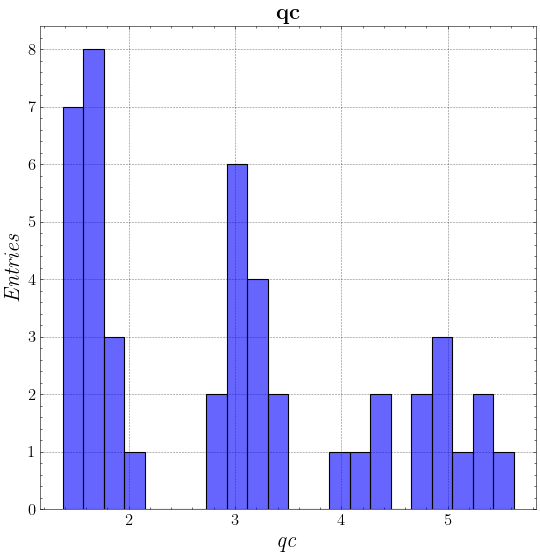

In [52]:
# PLOTTING HISTOGRAM ---------------------------------------
lim1, lim2 = 0, 6
target_df = df[(df['qc']<lim2) & (df['qc']>lim1)]['qc']
plotHistogram(target_df,22,'qc','qc','Entries')

In [47]:
df

,y1 (mm),Δy1 (mm),Time1 (s),Δt1 (s),v_g (m/s),y2 (mm),Δy2 (mm),Time2 (s),Δt2 (s),v_u (m/s),...,q (Coulomb),qc (Coulomb),N,$\Delta v_g$,$\Delta v_u$,$\Delta r$,$\Delta q$,$\Delta qc$,$\Delta N$,qc
0,1,0.1,8.75,0.01,0.00006,1,0.1,7.96,0.01,0.00006,...,3.580000e-19,3.080000e-19,1.930,0.000006,0.000006,3.680796e-08,3.201985e-20,2.765002e-20,0.172578,3.08
1,1,0.1,11.66,0.01,0.00004,1,0.1,5.50,0.01,0.00009,...,3.460000e-19,2.910000e-19,1.820,0.000004,0.000009,3.383921e-08,3.246973e-20,2.745365e-20,0.171352,2.91
2,1,0.1,18.50,0.01,0.00003,1,0.1,1.84,0.01,0.00027,...,6.140000e-19,4.960000e-19,3.100,0.000003,0.000027,2.461609e-08,6.575514e-20,5.336060e-20,0.333051,4.96
3,1,0.1,13.68,0.01,0.00004,1,0.1,1.15,0.01,0.00043,...,1.130000e-18,9.350000e-19,5.840,0.000004,0.000044,2.883058e-08,1.215394e-19,1.012588e-19,0.632007,9.35
4,1,0.1,12.56,0.01,0.00004,1,0.1,10.38,0.01,0.00005,...,2.190000e-19,1.830000e-19,1.150,0.000004,0.000005,3.140787e-08,1.999097e-20,1.681628e-20,0.104959,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1,0.1,22.16,0.01,0.00002,1,0.1,5.35,0.01,0.00009,...,2.180000e-19,1.730000e-19,1.080,0.000002,0.000009,2.518384e-08,2.173433e-20,1.731694e-20,0.108084,1.73
61,1,0.1,13.97,0.01,0.00004,1,0.1,2.84,0.01,0.00017,...,5.010000e-19,4.150000e-19,2.590,0.000004,0.000018,2.823082e-08,4.998006e-20,4.153963e-20,0.259270,4.15
62,1,0.1,23.94,0.01,0.00002,1,0.1,5.72,0.01,0.00009,...,1.950000e-19,1.540000e-19,0.960,0.000002,0.000009,2.330587e-08,1.995099e-20,1.580662e-20,0.098657,1.54
63,1,0.1,26.85,0.01,0.00002,1,0.1,4.94,0.01,0.00010,...,2.040000e-19,1.580000e-19,0.990,0.000002,0.000010,2.077399e-08,2.079420e-20,1.622126e-20,0.101245,1.58
